In [1]:
# 패션 MNIST 데이터 가져오기
import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [2]:
# Conv2D 데이터는 반드시 채널 차원이 필요
train_input = train_input.reshape(-1, 28, 28, 1) # 흑백 사진 = 1채널

In [3]:
# 정규화
train_scaled = train_input / 255.0

In [4]:
from sklearn.model_selection import train_test_split

# 훈련, 검증 세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2
)

In [5]:
# 층 구성
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2))

In [6]:
# DNN, FFNN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [10]:
# 훈련
model.compile(optimizer="adam" ,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

hist = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7310 - loss: 0.7462 - val_accuracy: 0.8763 - val_loss: 0.3358
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8685 - loss: 0.3686 - val_accuracy: 0.8968 - val_loss: 0.2782
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8911 - loss: 0.3071 - val_accuracy: 0.8951 - val_loss: 0.2771
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9009 - loss: 0.2762 - val_accuracy: 0.9125 - val_loss: 0.2413
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9089 - loss: 0.2482 - val_accuracy: 0.9118 - val_loss: 0.2376
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9167 - loss: 0.2278 - val_accuracy: 0.9165 - val_loss: 0.2307
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9230 - loss: 0.2131 - val_accuracy: 0.9185 - val_loss: 0.2280
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9293 - loss

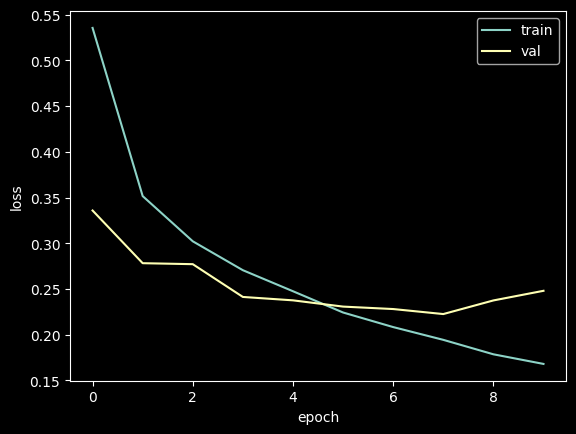

In [11]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [14]:
import numpy as np
predictions = model.predict(test_scaled[:10])
#np.round(predictions, decimals=3)
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])